In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [43]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [45]:
df.isna().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Ice Cream Data')

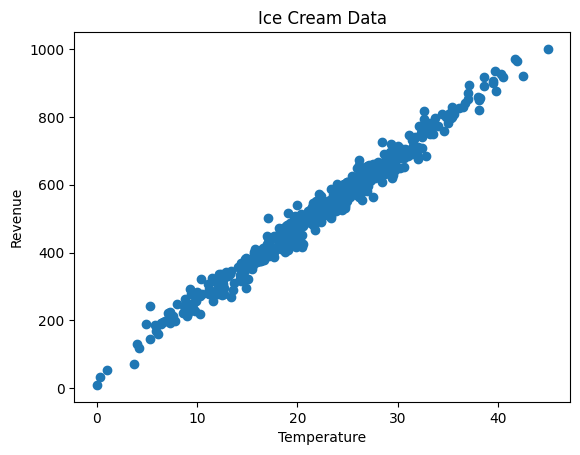

In [46]:
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Ice Cream Data')

<Axes: >

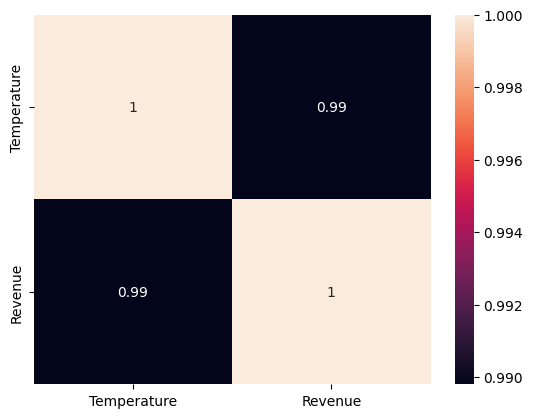

In [47]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

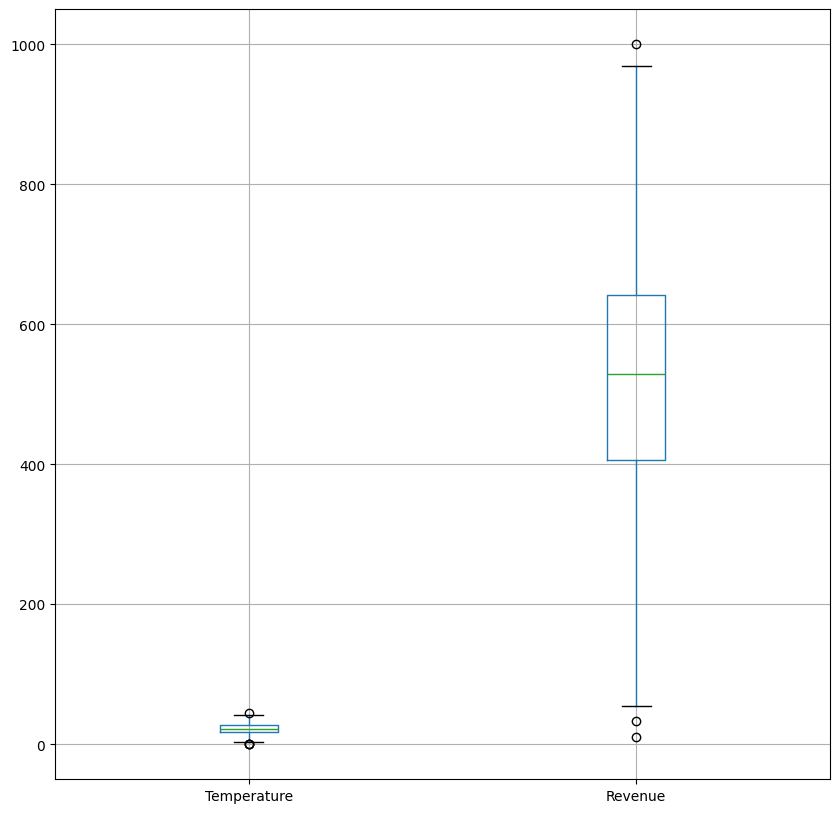

In [48]:
plt.figure(figsize=(10, 10))
df.boxplot()

In [49]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [50]:
x = np.array(df.Temperature.values)
y = np.array(df.Revenue.values)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
regressor = DecisionTreeRegressor()

In [53]:
regressor.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

DecisionTreeRegressor()

# Testing The Model

In [54]:
y_pred = regressor.predict(x_test.reshape(-1, 1))

# Comparing y_test & y_pred

In [55]:
comp = pd.DataFrame({"Actual Values": y_test.reshape(-1), "Predicted Values": y_pred.reshape(-1)})
comp

,Actual Values,Predicted Values
0,704.281439,690.789296
1,632.901914,639.538012
2,662.558990,682.808566
3,449.813300,475.213354
4,636.298374,655.660388
...,...,...
95,506.222379,483.333078
96,749.367154,756.037702
97,684.158444,702.623614
98,381.564135,394.168620


Text(0, 0.5, 'y_test')

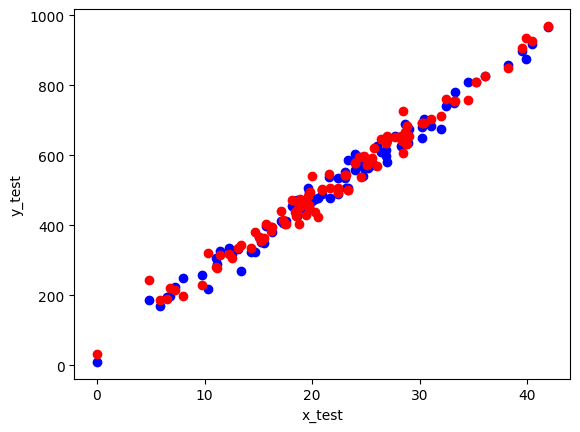

In [56]:
plt.scatter(x_test, y_test, color='blue')
plt.scatter(x_test, y_pred, color='red')
plt.xlabel('x_test')
plt.ylabel('y_test')

<Axes: >

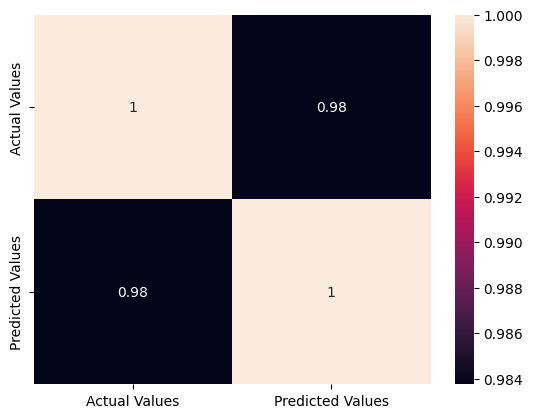

In [57]:
sns.heatmap(comp.corr(), annot=True)

<Axes: >

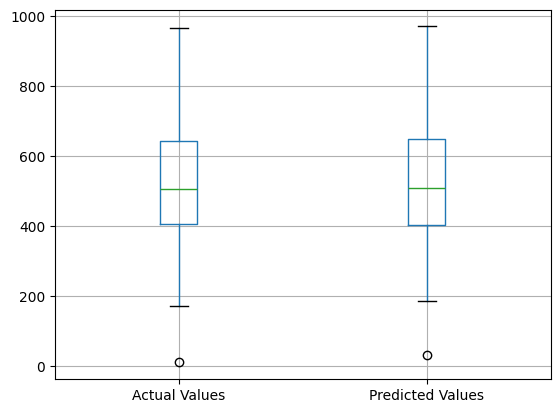

In [58]:
comp.boxplot()

# Performance

In [59]:
r2_score(y_test, y_pred)

0.9666304858535445

In [60]:
mean_absolute_error(y_test, y_pred)

24.992661634199997

In [61]:
mean_squared_error(y_test, y_pred)

1083.5223342426912